In [9]:
import pandas as pd

file_path = '../data/processed/kanye_lyrics_cleaned.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

#check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

#check data types
print("\nData types of each column:")
print(data.dtypes)

First few rows of the dataset:
               title      artist  \
0          Heartless  Kanye West   
1           Stronger  Kanye West   
2        Gold Digger  Kanye West   
3        Jesus Walks  Kanye West   
4  All of the Lights  Kanye West   

                                              lyrics  view_count  
0  [ Chorus ] night , hear 'em talk coldest story...     1341214  
1  [ Produced Kanye West , Mike Dean , Timbaland ...     1589284  
2  [ Produced Kanye West Jon Brion ] [ Intro : Ja...     2243402  
3  [ Intro ] war war terrorism , racism war [ Cho...     1236255  
4  [ Produced Kanye West ; Co-Produced Jeff Bhask...     1844898  

Missing values in the dataset:
title         0
artist        0
lyrics        0
view_count    0
dtype: int64

Data types of each column:
title         object
artist        object
lyrics        object
view_count     int64
dtype: object


In [10]:
#summary display
summary_stats = data.describe()

#summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
         view_count
count  1.000000e+01
mean   1.936890e+06
std    7.750439e+05
min    4.959840e+05
25%    1.403232e+06
50%    2.044150e+06
75%    2.446746e+06
max    2.981993e+06


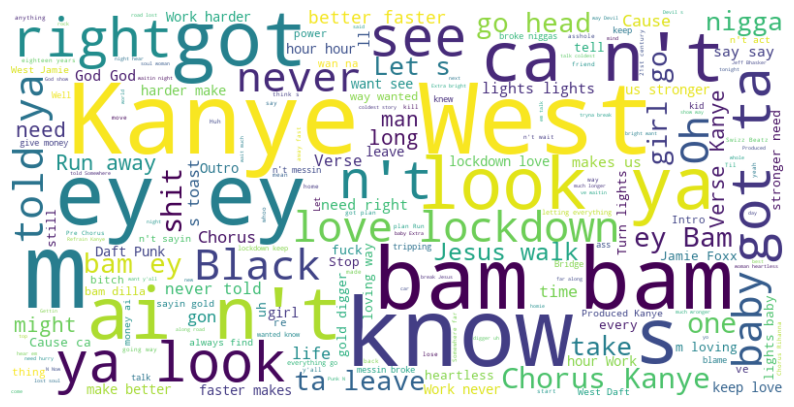

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#check for lyrics
text = ' '.join(data['lyrics'].astype(str).tolist())

#generate a word cloud image
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

#display word cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


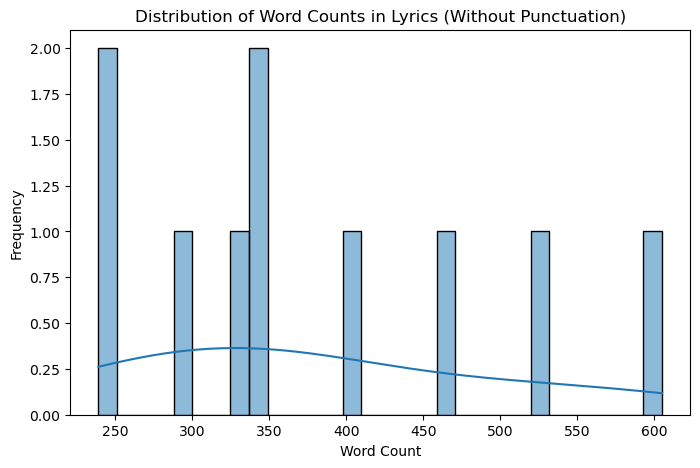

In [18]:
import string
from nltk.tokenize import word_tokenize

#tokenize and count words, excluding punctuation
def count_words_without_punctuation(lyrics):
    translator = str.maketrans('', '', string.punctuation)
    words = word_tokenize(lyrics)
    filtered_words = [word.translate(translator) for word in words if word.translate(translator)]
    return len(filtered_words)

#calculate word count without punctuation
data['word_count_without_punctuation'] = data['lyrics'].apply(count_words_without_punctuation)

#plot the distribution of word
plt.figure(figsize=(8, 5))
sns.histplot(data['word_count_without_punctuation'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Lyrics (Without Punctuation)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


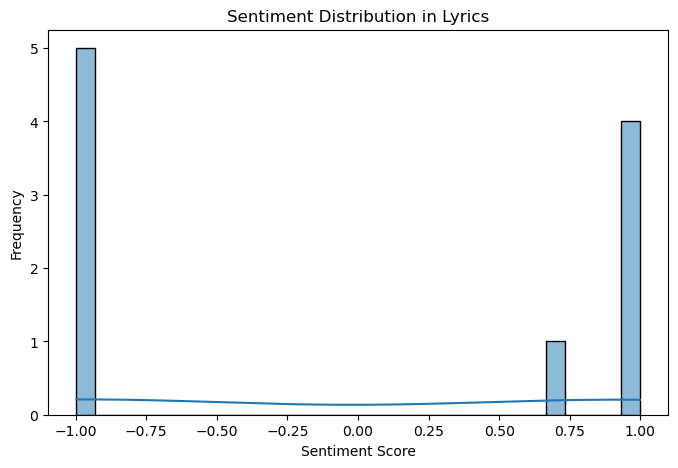

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

#sentiment analyzer
sia = SentimentIntensityAnalyzer()

#sentiment scores for each lyric
data['sentiment_score'] = data['lyrics'].apply(lambda x: sia.polarity_scores(x)['compound'])

#plot
plt.figure(figsize=(8, 5))
sns.histplot(data['sentiment_score'], kde=True, bins=30)
plt.title('Sentiment Distribution in Lyrics')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [22]:
print(data.dtypes)


title                              object
artist                             object
lyrics                             object
view_count                          int64
word_count_without_punctuation      int64
sentiment_score                   float64
artist_encoded                      int64
dtype: object


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

#select only numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

#calculate the correlation
correlation_matrix = data[numeric_columns].corr()

print(correlation_matrix)


                                view_count  word_count_without_punctuation  \
view_count                        1.000000                        0.360452   
word_count_without_punctuation    0.360452                        1.000000   
sentiment_score                  -0.286904                        0.272377   
artist_encoded                         NaN                             NaN   

                                sentiment_score  artist_encoded  
view_count                            -0.286904             NaN  
word_count_without_punctuation         0.272377             NaN  
sentiment_score                        1.000000             NaN  
artist_encoded                              NaN             NaN  


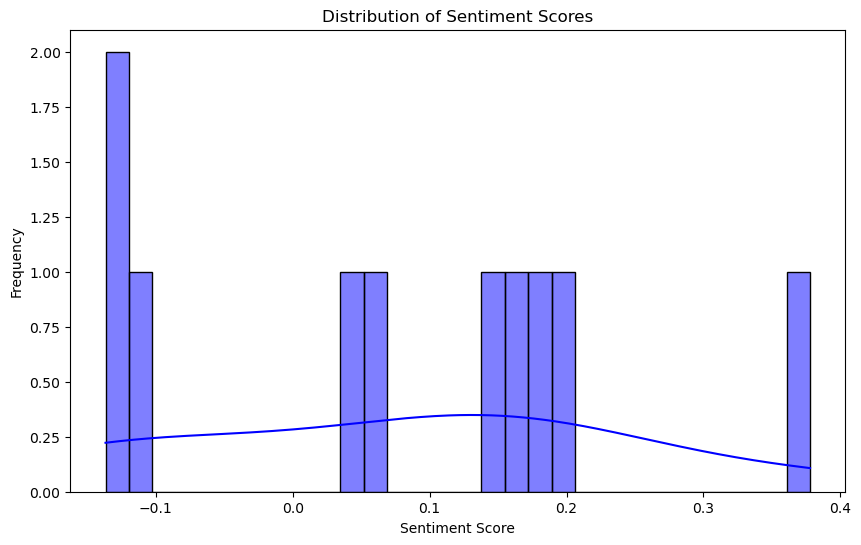

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

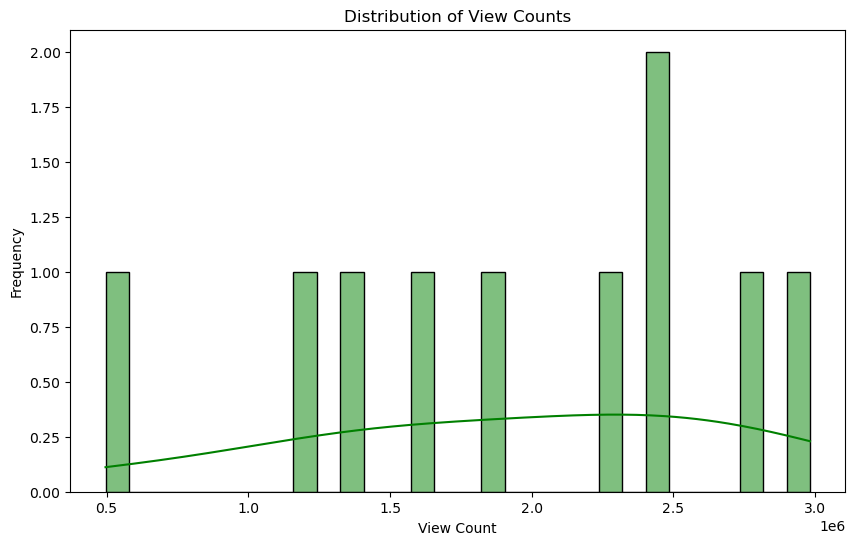

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['view_count'], bins=30, kde=True, color='green')
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()